In [2]:
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


            Produção de caminhões
Data                             
1995-01-01                   5166
1995-02-01                   5853
1995-03-01                   7117
1995-04-01                   6410
1995-05-01                   6722
...                           ...
2024-03-01                  11224
2024-04-01                  11656
2024-05-01                  11172
2024-06-01                  12236
2024-07-01                  11909

[355 rows x 1 columns]


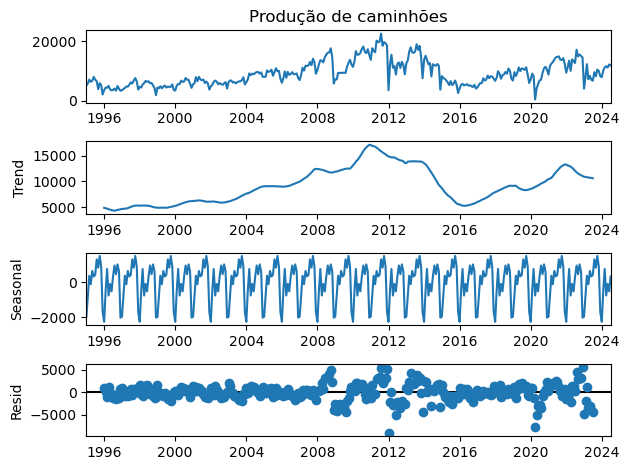

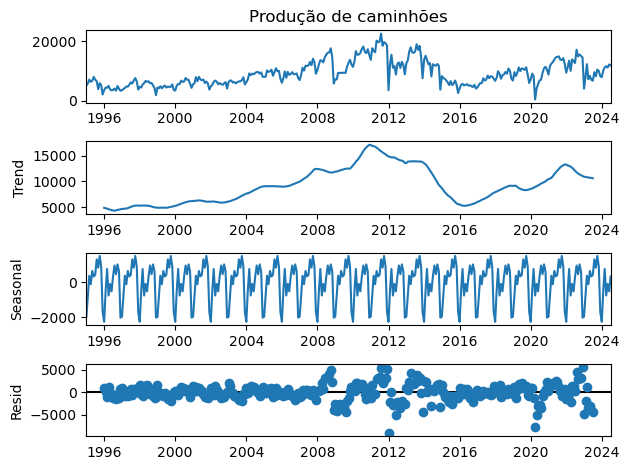

In [3]:
# 1.Analise a série de produção de Ônibus correspondente e responda às seguintes questões:

df_veiculos = pd.read_excel('CP4 Time Series.xlsx')

df_veiculos['Data'] = pd.to_datetime(df_veiculos['Data'])
df_caminhoes = df_veiculos[['Data', 'Produção de caminhões']].set_index('Data')
print(df_caminhoes)

# a)(1,0) Utilizando a função seasonal_decompose e um período de 24 meses (period=24), explique se há alguma tendência clara de longo prazo na produção dos veículos e se há sazonalidade nesta variável.

decomposition = seasonal_decompose(df_caminhoes['Produção de caminhões'], period=24, model='additive')
decomposition.plot()


In [4]:
# b)(1,0) Com a função adfuller, realize o teste de estacionariedade para a variável de produção de veículos. A série é estacionária? Se a série não for estacionária, realize o teste de estacionariedade para a primeira diferença da sua série. Após a realização do teste, a série resultante é estacionária?


adf_test = adfuller(df_caminhoes['Produção de caminhões'])
print(f'Estatística ADF: {adf_test[0]}')
print(f'p-valor: {adf_test[1]}')

if adf_test[1] < 0.05:
    print('A série é estacionária')
else:
    print('A série NÃO é estacionária')

# Estatística ADF: -2.6176665685898
# p-valor: 0.08940064149832394
# A série NÃO é estacionária

Estatística ADF: -2.6176665685898
p-valor: 0.08940064149832394
A série NÃO é estacionária


In [5]:
# c)(1,0) Antes de fazer as projeções, é necessário testar que modelo melhor se adequa aos dados. Utilize a função ARIMA para testar modelos com as ordens (1, 1, 1), (2, 1, 2) e (12, 1, 12). Com base no critério BIC, qual destes modelos é o mais indicado para realizar a projeção da série futura?

# (1, 1, 1)
model_111 = ARIMA(df_caminhoes['Produção de caminhões'], order=(1, 1, 1))
model_111_fit = model_111.fit()
bic_111 = model_111_fit.bic

# (2, 1, 2)
model_212 = ARIMA(df_caminhoes['Produção de caminhões'], order=(2, 1, 2))
model_212_fit = model_212.fit()
bic_212 = model_212_fit.bic

# (12, 1, 12)
model_1212 = ARIMA(df_caminhoes['Produção de caminhões'], order=(12, 1, 12))
model_1212_fit = model_1212.fit()
bic_1212 = model_1212_fit.bic

# Comparar os BICs
print(f'BIC do modelo ARIMA(1,1,1): {bic_111}')
print(f'BIC do modelo ARIMA(2,1,2): {bic_212}')
print(f'BIC do modelo ARIMA(12,1,12): {bic_1212}')


# BIC do modelo ARIMA(1,1,1): 6390.106949366619 (melhor modelo)
# BIC do modelo ARIMA(2,1,2): 6396.374957913955
# BIC do modelo ARIMA(12,1,12): 6412.25643719339

c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self.

BIC do modelo ARIMA(1,1,1): 6390.106949366619
BIC do modelo ARIMA(2,1,2): 6396.374957913955
BIC do modelo ARIMA(12,1,12): 6412.25643719339


In [6]:
# d)(1,0) Utilizando o melhor modelo ARIMA com base nos critérios mencionados, realize a projeção da quantidade de veículos produzidos com a função .forecast. Quantos veículos devem ser produzidos em dezembro de 2024?

# modelo escolhido para fazer a previsão  ARIMA(1,1,1) melhor
model_forecast = model_111_fit.forecast(steps=12) 
previsao_dezembro_2024 = model_forecast['2024-12-01']
print(f'Previsão para dezembro de 2024: {previsao_dezembro_2024}')

# Previsão de onibus produzidos para dezembro em 2024: 11459


Previsão para dezembro de 2024: 11459.144671910093


            Vendas de veículos pelas concessionárias - caminhões
Data                                                            
1995-01-01                                               4205   
1995-02-01                                               5189   
1995-03-01                                               6041   
1995-04-01                                               5006   
1995-05-01                                               5792   
...                                                       ...   
2024-03-01                                               9654   
2024-04-01                                              10549   
2024-05-01                                               9359   
2024-06-01                                               9662   
2024-07-01                                              11082   

[355 rows x 1 columns]


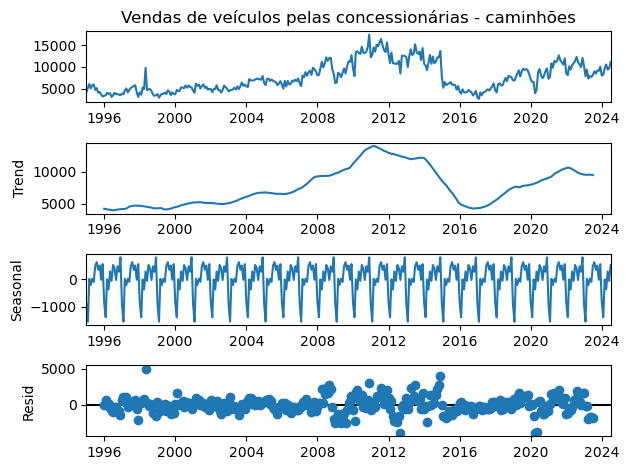

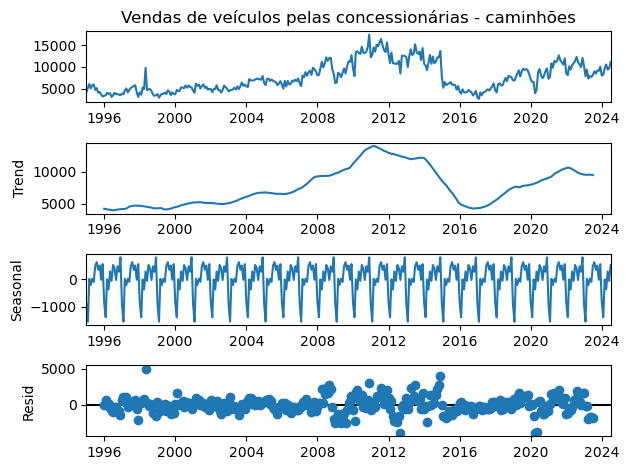

In [7]:
# 2.Analise a série de  Vendas de veículos pelas concessionárias - ônibus e responda às seguintes questões:
# a)(1,0) Utilizando a função seasonal_decompose e um período de 24 meses (period=24), explique se há alguma tendência clara de longo prazo na venda dos veículos e se há sazonalidade nesta variável.

df_veiculos['Data'] = pd.to_datetime(df_veiculos['Data'])
df_venda_caminhoes = df_veiculos[['Data', 'Vendas de veículos pelas concessionárias - caminhões']].set_index('Data')
print(df_venda_caminhoes)

decomposition = seasonal_decompose(df_venda_caminhoes['Vendas de veículos pelas concessionárias - caminhões'], period=24, model='additive')
decomposition.plot()




In [9]:
# b)(1,0) Com a função adfuller, realize o teste de estacionariedade para a variável de vendas de veículos. A série é estacionária? Se a série não for estacionária, realize o teste de estacionariedade para a primeira diferença da sua série. Após a realização do teste, a série resultante é estacionária?

adf_test = adfuller(df_venda_caminhoes['Vendas de veículos pelas concessionárias - caminhões'])
print(f'Estatística ADF: {adf_test[0]}')
print(f'p-valor: {adf_test[1]}')

if adf_test[1] < 0.05:
    print('A série é estacionária')
else:
    print('A série NÃO é estacionária')

# Estatística ADF: -2.053005484153884
# p-valor: 0.2638260660680753
# A série NÃO é estacionária



Estatística ADF: -2.053005484153884
p-valor: 0.2638260660680753
A série NÃO é estacionária


In [11]:
# c)(1,0) Antes de fazer as projeções, é necessário testar que modelo melhor se adequa aos dados. Utilize a função ARIMA para testar modelos com as ordens (1, 1, 1), (2, 1, 2) e (12, 1, 12). Com base no critério BIC, qual destes modelos é o mais indicado para realizar a projeção da série futura?

#ARIMA(1, 1, 1)
model_111 = ARIMA(df_venda_caminhoes['Vendas de veículos pelas concessionárias - caminhões'], order=(1, 1, 1))
model_111_fit = model_111.fit()
bic_111 = model_111_fit.bic

# (2, 1, 2)
model_212 = ARIMA(df_venda_caminhoes['Vendas de veículos pelas concessionárias - caminhões'], order=(2, 1, 2))
model_212_fit = model_212.fit()
bic_212 = model_212_fit.bic

# (12, 1, 12)
model_1212 = ARIMA(df_venda_caminhoes['Vendas de veículos pelas concessionárias - caminhões'], order=(12, 1, 12))
model_1212_fit = model_1212.fit()
bic_1212 = model_1212_fit.bic

# Comparar os BICs
print(f'BIC do modelo ARIMA(1,1,1): {bic_111}')
print(f'BIC do modelo ARIMA(2,1,2): {bic_212}')
print(f'BIC do modelo ARIMA(12,1,12): {bic_1212}')


# BIC do modelo ARIMA(1,1,1): 6037.86177043863 (melhor modelo)
# BIC do modelo ARIMA(2,1,2): 6037.1234244509915 
# BIC do modelo ARIMA(12,1,12): 6061.222145643164

c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self.

BIC do modelo ARIMA(1,1,1): 6037.86177043863
BIC do modelo ARIMA(2,1,2): 6037.1234244509915
BIC do modelo ARIMA(12,1,12): 6061.222145643164


c:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
# d)(1,0) Utilizando o melhor modelo ARIMA com base nos critérios mencionados, realize a projeção da quantidade de veículos vendidos com a função .forecast. Quantos veículos devem ser produzidos em dezembro de 2024? Em dezembro de 2024, haverá mais veículos produzidos ou vendidos?

model_forecast = model_111_fit.forecast(steps=12) 
previsao_dezembro_2024 = model_forecast['2024-12-01']
print(f'Previsão para dezembro de 2024: {previsao_dezembro_2024}')


# Previsão de vendas para dezembro de 2024: 11459
# Previsão de caminhões produzidos para dezembro em 2024: 10351

#segundo a projeção: Haverá mais caminhões vendidas


Previsão para dezembro de 2024: 10351.48257606901


In [13]:
# 3.Analise a coluna correspondente e responda às seguintes questões:

# a)(1,0) A coluna de variável do aluno apresenta alguns valores incorretos. A variável ‘Study Hours per Week’ pode variar de 0 a 20, a variável ‘Attendance Rate’ pode variar de 25 a 100 e a variável ‘Previous Grades’ pode variar de 25 a 100. Valores acima ou abaixo destes limites estão incorretos. Sendo assim, calcule a média da coluna que você deve avaliar (Tabela de Variáveis) e, após substituir os valores que estão acima do limite pelo valor máximo esperado e os valores que estão abaixo do limite pelo valor mínimo esperado, calcule uma nova média para a referida coluna. Em seguida, foi observado também que a coluna possui valores faltantes (NAs). Pede-se que você substitua estes valores pela média da coluna.



df = pd.read_csv('CP4 Data Cleaning.csv')


columns_limits = {
    'Previous Grades': (25, 100)
}


def correct_values(series, min_val, max_val):
    
    corrected = series.clip(lower=min_val, upper=max_val)
    return corrected


for column, (min_val, max_val) in columns_limits.items():
    original_mean = df[column].mean()  # Média antes das correções
    print(f'Média original para {column}: {original_mean}')
    
  
    df[column] = correct_values(df[column], min_val, max_val)
    
    
    corrected_mean = df[column].mean()
    print(f'Nova média para {column} (após correção): {corrected_mean}')
    
 
    df[column].fillna(corrected_mean, inplace=True)

   
    final_mean = df[column].mean()
    print(f'Média final para {column} (após preenchimento de NAs): {final_mean}\n')

print(df)

# Média original para Previous Grades: 65.4401068252378
# Nova média para Previous Grades (após correção): 65.14020944061444
# Média final para Previous Grades (após preenchimento de NAs): 65.14020944061429

Média original para Previous Grades: 65.4401068252378
Nova média para Previous Grades (após correção): 65.14020944061444
Média final para Previous Grades (após preenchimento de NAs): 65.14020944061429

      Student ID  Study Hours per Week  Attendance Rate  Previous Grades  \
0         S00001                  12.5              NaN        75.000000   
1         S00002                   9.3             95.3        60.600000   
2         S00003                  13.2              NaN        64.000000   
3         S00004                  17.6             76.8        62.400000   
4         S00005                   8.8             89.3        72.700000   
...          ...                   ...              ...              ...   
39995     S39996                  15.6             93.8        51.400000   
39996     S39997                  11.3             66.4        64.200000   
39997     S39998                  13.1             65.6        38.100000   
39998     S39999                  14.1

In [42]:
# b)(1,0) Em seguida, foi observado que a contagem de observações para cada categoria da coluna ‘Parent Education Level’ parece um pouco fora do padrão. Esta coluna classifica a formação dos pais dos alunos, indo de ‘High School’ a ‘Doctorate’. Descubra o que há de errado nesta coluna, manipule a coluna de forma a normalizar os dados e gere uma nova contagem do número de observações de cada categoria (não é necessário fazer nenhuma modificação nos NAs).


normalization_dict = {
    'High School': 'High School',
    'highschool': 'High School',
    'Bachelor': 'Bachelor',
    'Bachelors': 'Bachelor',
    'bachelor': 'Bachelor',
    'BACHELOR': 'Bachelor',
    'Master': 'Master',
    'MASTER': 'Master',
    'master': 'Master',
    'Masters': 'Master',
    'Doctorate': 'Doctorate',
    'doctorate': 'Doctorate',
    'DOCTORATE': 'Doctorate',
    'PHD': 'PhD',
    'phd': 'PhD'
}

# Função para normalizar a coluna 'Parent Education Level'
df['Parent Education Level Normalized'] = df['Parent Education Level'].map(normalization_dict)

# Contagem das categorias normalizadas
category_counts = df['Parent Education Level Normalized'].value_counts(dropna=False)

# Exibir a nova contagem das categorias
print("Contagem de observações para cada categoria (após normalização):")
print(category_counts)


# Contagem de observações para cada categoria (após normalização):
# NaN            10786
# Bachelor        7685
# Doctorate       7610
# Master          7426
# High School     6493


Contagem de observações para cada categoria (após normalização):
NaN            10786
Bachelor        7685
Doctorate       7610
Master          7426
High School     6493
Name: Parent Education Level Normalized, dtype: int64
